In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


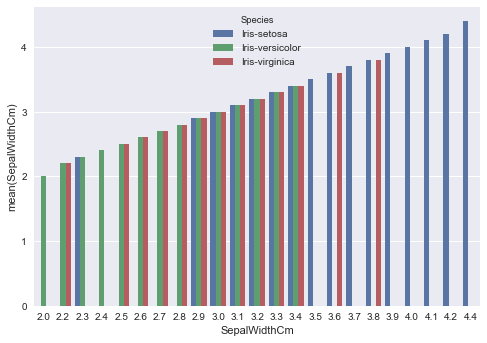

In [3]:
sns.barplot(x='SepalWidthCm',y='SepalWidthCm',hue='Species',data=df)

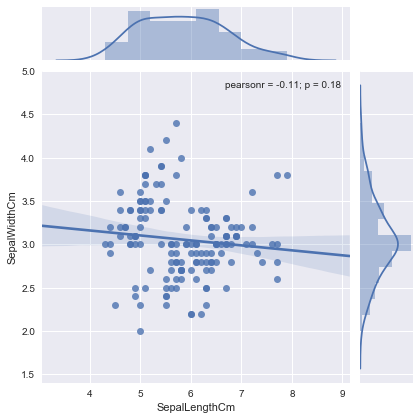

In [4]:
sns.jointplot('SepalLengthCm','SepalWidthCm',data=df,kind='reg')

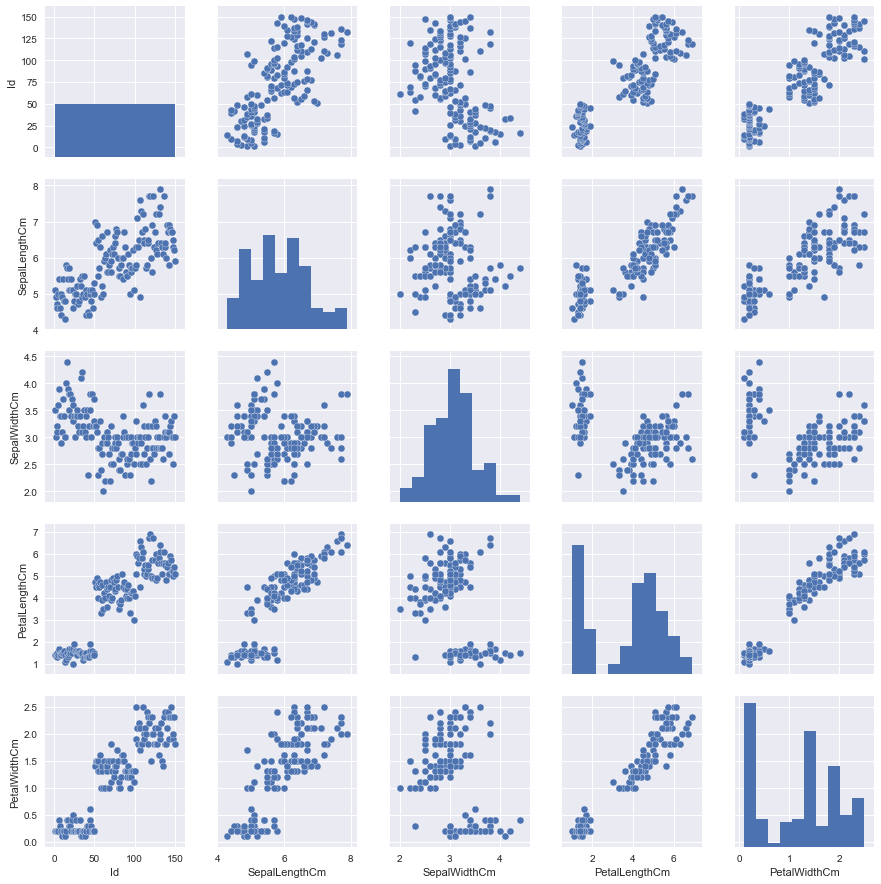

In [5]:
sns.pairplot(df)

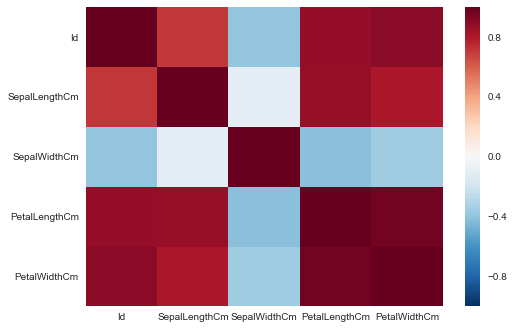

In [6]:
sns.heatmap(df.corr())

In [7]:
X =df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [8]:
target_map = {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
df['Species'] = df['Species'].apply(lambda x: target_map[x])
y = df['Species']

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()

In [13]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pred = log.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.90      0.95        20
          2       0.86      1.00      0.92        12

avg / total       0.96      0.96      0.96        45



In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
# PCA IMPLementation


In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [20]:
std.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled = std.transform(X)

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
xpca = pca.transform(scaled)

In [26]:
xpca.shape

(150L, 2L)

In [27]:
scaled.shape

(150L, 4L)

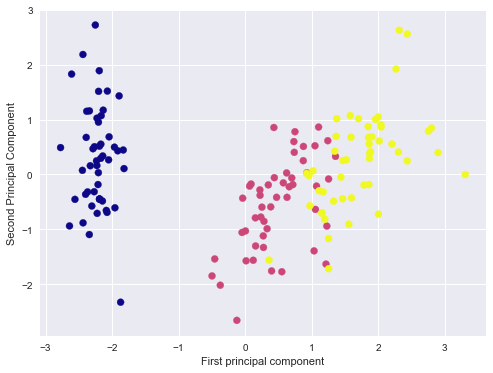

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0],xpca[:,1],c=df['Species'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [29]:
#linear regression with normal equation

In [30]:
df.insert(0, 'Ones', 1)

In [31]:
X = df[['Ones','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X.head()

,Ones,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [32]:
y = df['Species']

In [33]:
#normal method
inverse= np.linalg.inv(X.T*X)

In [34]:
reg = np.eye(inverse.shape[0],inverse.shape[1])
reg[0,0] = 0

In [35]:
inverse.shape

(155L, 155L)

In [36]:
inverse

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

#########################Using Kmeans clustering#########################

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=3)

In [39]:
kmeans.fit(df.drop('Species',axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.cluster_centers_

array([[   1.   ,   25.5  ,    5.006,    3.418,    1.464,    0.244],
       [   1.   ,  125.5  ,    6.588,    2.974,    5.552,    2.026],
       [   1.   ,   75.5  ,    5.936,    2.77 ,    4.26 ,    1.326]])

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Species'],kmeans.labels_))
print(classification_report(df['Species'],kmeans.labels_))

[[50  0  0]
 [ 0  0 50]
 [ 0 50  0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.00      0.00      0.00        50
          2       0.00      0.00      0.00        50

avg / total       0.33      0.33      0.33       150



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!